In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# open a file containing descriptors and yield
data = pd.read_csv("Descriptor_and_yield_table.csv")
X_data = data.drop(['yield'], axis =1) # the 120 descriptors and their values
y_data = data['yield'] # Yield of the 3560 rows is stored in the y_data variable

In [4]:
data.head()

,Unnamed: 0,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,...,ligand_V6_frequency,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,yield
0,1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,10.657812
1,2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,14.747896
2,3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,18.278686
3,4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,2.475058
4,5,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,6.119058


#### RandomForestRegressor

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=500, random_state=1)

In [6]:
# Data preprocessing
pipe = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])

In [7]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [9]:
pipe.score(X_train,y_train)

0.9875960322857106

In [8]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 7.804035196440268


In [10]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9211460824649376


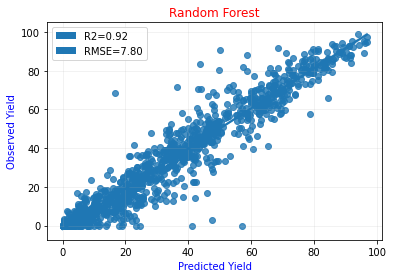

In [11]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

#### XGBoost 

In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, random_state=42)

In [17]:
pipe2 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb)])

In [18]:
# Model Training and prediction
pipe2.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = pipe2.predict(X_valid) # predicting yield for 30% of the data

In [19]:
pipe2.score(X_train,y_train)

0.9999244395396787

In [20]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse:', rmse2)

rmse: 7.316959262420068


In [21]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.9306819862783721


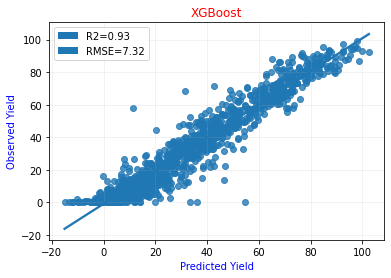

In [22]:
sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])

#### GradientBoosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gb = GradientBoostingRegressor(n_estimators=500, random_state=0)

In [25]:
pipe3 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', gb)])

In [26]:
pipe3.fit(X_train,y_train) # training using 70% of the data

Pipeline(steps=[('scale', StandardScaler()), ('preprocessor', SimpleImputer()),
                ('model',
                 GradientBoostingRegressor(n_estimators=500, random_state=0))])

In [27]:
predicted_yield3 = pipe3.predict(X_valid) # predicting yield for 30% of the data

In [28]:
pipe3.score(X_train,y_train)

0.9439349773188975

In [29]:
# Model accuracy using root mean square error 
rmse3 = np.sqrt(mean_squared_error(y_valid, predicted_yield3))  
print('rmse:', rmse3)

rmse: 9.20524368014084


In [30]:
# R^2 (coefficient of determination) regression score function: 
R_3 =r2_score(y_valid, predicted_yield3)
print('R^2:', R_3)

R^2: 0.8902876759920894


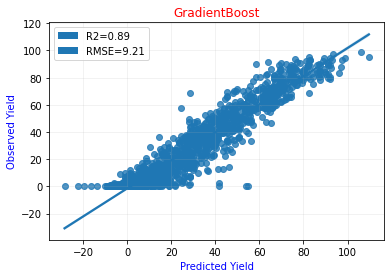

In [31]:
sn.regplot(x=predicted_yield3, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("GradientBoost", color='red')
plt.grid(alpha=0.2)
R_3 = mpatches.Patch(label="R2={:04.2f}".format(R_3))
rmse3 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse3))
plt.legend(handles=[R_3, rmse3])

### Conclusion:

* Both RF, XGboost models are performing with >98% accuracy.
* Gradientboosting is giving the poor accuracy compared to RF, XGBoost.